In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [8]:
for col in df.select_dtypes('bool').columns:
    df[col] = df[col].astype(int)

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=25)


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [44]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=11))
model.add(Dense(1, activation='relu'))

In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [52]:
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 0.3938
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 0.3661
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.3814
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.3784
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.3756
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.3885
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.3886
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 0.3714
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.3996
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.4070
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 0.3750
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 0.3808
Epoch 13/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.3663
Epoch 14/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 0.3836
Epoch 15/100
25

In [48]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


In [49]:
import numpy as np
y_pred = np.where(y_log>0.5, 1, 0)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, y_pred)

0.844

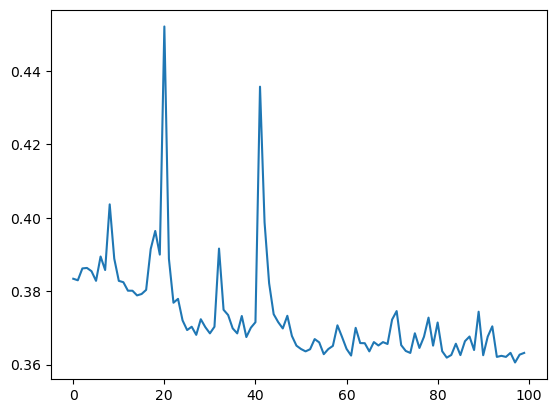

In [56]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])